In [2]:
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd

In [3]:
data = pd.read_csv("C:/Users/DELL/Desktop/Datascience Course/Projects and assignments/Multi Linear Regression/50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,165349.20,136897.80,471784.10,New York,192261.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,162597.70,151377.59,443898.53,California,191792.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,153441.51,101145.55,407934.54,Florida,191050.39,NaN,NaN,NaN,NaN,NaN,NaN,Comparision between Countries,NaN,NaN,NaN,NaN
3,144372.41,118671.85,383199.62,New York,182901.99,NaN,NaN,NaN,NaN,NaN,NaN,Row Labels,Sum of Marketing Spend,Sum of R&D Spend,Sum of Profit,Sum of Administration
4,142107.34,91391.77,366168.42,Florida,166187.94,NaN,NaN,NaN,NaN,NaN,NaN,California,3103195.8,1099180.46,1766387.98,2052690.62


In [4]:
data.shape

(50, 16)

In [5]:
X = data[['R&D Spend','Marketing Spend']]  ###Independent Variables
X.shape

(50, 2)

In [6]:
y = data.Profit
y.shape

(50,)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)
X_train.shape,y_train.shape

((35, 2), (35,))

In [8]:
X_test.shape,y_test.shape

((15, 2), (15,))

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()

In [11]:
model_train = model.fit(X_train,y_train)
print("Model Training is completed")
acc = model_train.score(X_train,y_train)
print("The accuracy of the model training is ",round(acc,2))


Model Training is completed
The accuracy of the model training is  0.94


In [12]:
### Prediction Profit based on 
pred = model_train.predict(X_test)

In [13]:
pred

array([113655.67739995, 150986.88342765, 171858.44250957,  73409.03300087,
        74319.63299661, 159067.60071484,  46783.31383823, 126710.8719638 ,
       161382.21029915, 179733.388317  ,  67889.41680954, 133949.33522424,
        89387.02902002,  82165.16162485, 127667.60605174])

In [14]:
residuals_data = pd.DataFrame({'Actual Profit': y_test, 'Predict Profit': pred, 'Error': (y_test -pred)})
residuals_data

,Actual Profit,Predict Profit,Error
27,105008.31,113655.677400,-8647.367400
8,152211.77,150986.883428,1224.886572
3,182901.99,171858.442510,11043.547490
41,77798.83,73409.033001,4389.796999
40,78239.91,74319.632997,3920.277003
7,155752.60,159067.600715,-3315.000715
47,42559.73,46783.313838,-4223.583838
13,134307.35,126710.871964,7596.478036
5,156991.12,161382.210299,-4391.090299
2,191050.39,179733.388317,11317.001683


In [15]:
from sklearn.metrics import r2_score,mean_squared_error

In [16]:
r2_score(y_test,pred)

0.9680549474497022

In [17]:
mean_squared_error(y_test,pred)

57297418.38086942

In [18]:
def multi_split(X,y,ts):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = ts)
   # return X_train,y_train,X_test,y_test
    model = LinearRegression()
    model_train = model.fit(X_train,y_train)
    #return model_train

In [19]:
X = data[['R&D Spend','Marketing Spend']]
y = data.Profit
ts = 0.2
multi_split(X,y,ts)
acc = model_train.score(X_train,y_train)  ## Actual
print("The accuracy of the model training is ",round(acc,2))
pred = model_train.predict(X_test)  ## Prediction Data
score = r2_score(y_test,pred)
print("The r2_score of predict data of the model training is ",score)

##To find the Errors
residuals_data = pd.DataFrame({'Actual Profit':y_test, 'Predict Profit':pred, 'Error':(y_test - pred)})
residuals_data


The accuracy of the model training is  0.94
The r2_score of predict data of the model training is  0.9680549474497022


,Actual Profit,Predict Profit,Error
27,105008.31,113655.677400,-8647.367400
8,152211.77,150986.883428,1224.886572
3,182901.99,171858.442510,11043.547490
41,77798.83,73409.033001,4389.796999
40,78239.91,74319.632997,3920.277003
7,155752.60,159067.600715,-3315.000715
47,42559.73,46783.313838,-4223.583838
13,134307.35,126710.871964,7596.478036
5,156991.12,161382.210299,-4391.090299
2,191050.39,179733.388317,11317.001683


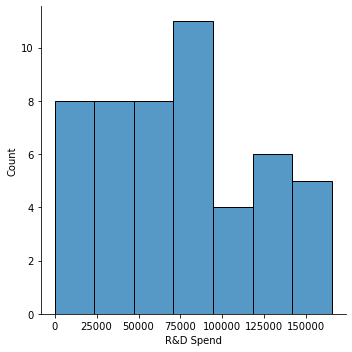

In [23]:
sns.displot(x = data['R&D Spend'])

In [56]:
X = data[['Administration','Marketing Spend']]
y = data.Profit
ts = 0.4
multi_split(X,y,ts)
acc = model_train.score(X_train,y_train)  ## Actual
print("The accuracy of the model training is ",round(acc,2))
pred = model_train.predict(X_test)  ## Prediction Data
score = r2_score(y_test,pred)
print("The r2_score of predict data of the model training is ",score)

##To find the Errors
residuals_data = pd.DataFrame({'Actual Profit':y_test, 'Predict Profit':pred, 'Error':(y_test - pred)})
residuals_data

The accuracy of the model training is  0.95
The r2_score of predict data of the model training is  0.9414331362053839


,Actual Profit,Predict Profit,Error
33,96778.92,97404.488330,-625.568330
8,152211.77,153280.553359,-1068.783359
24,108552.04,112926.712064,-4374.672064
35,96479.51,89402.520982,7076.989018
48,35673.41,46465.771524,-10792.361524
10,146121.95,135738.925867,10383.024133
17,125370.37,131314.181948,-5943.811948
26,105733.54,111341.738424,-5608.198424
45,64926.08,46893.708776,18032.371224
21,111313.02,118506.203789,-7193.183789


In [57]:
X = data[['R&D Spend','Administration']]
y = data.Profit
ts = 0.3
multi_split(X,y,ts)
acc = model_train.score(X_train,y_train)  ## Actual
print("The accuracy of the model training is ",round(acc,2))
pred = model_train.predict(X_test)  ## Prediction Data
score = r2_score(y_test,pred)
print("The r2_score of predict data of the model training is ",score)

##To find the Errors
residuals_data = pd.DataFrame({'Actual Profit':y_test, 'Predict Profit':pred, 'Error':(y_test - pred)})
residuals_data

The accuracy of the model training is  0.95
The r2_score of predict data of the model training is  0.9414331362053839


,Actual Profit,Predict Profit,Error
33,96778.92,97404.488330,-625.568330
8,152211.77,153280.553359,-1068.783359
24,108552.04,112926.712064,-4374.672064
35,96479.51,89402.520982,7076.989018
48,35673.41,46465.771524,-10792.361524
10,146121.95,135738.925867,10383.024133
17,125370.37,131314.181948,-5943.811948
26,105733.54,111341.738424,-5608.198424
45,64926.08,46893.708776,18032.371224
21,111313.02,118506.203789,-7193.183789


In [58]:
X = data[['R&D Spend','State']]
y = data.Profit
ts = 0.6
multi_split(X,y,ts)
acc = model_train.score(X_train,y_train)  ## Actual
print("The accuracy of the model training is ",round(acc,2))
pred = model_train.predict(X_test)  ## Prediction Data
score = r2_score(y_test,pred)
print("The r2_score of predict data of the model training is ",score)

##To find the Errors
residuals_data = pd.DataFrame({'Actual Profit':y_test, 'Predict Profit':pred, 'Error':(y_test - pred)})
residuals_data

The accuracy of the model training is  0.95
The r2_score of predict data of the model training is  0.9414331362053839


,Actual Profit,Predict Profit,Error
33,96778.92,97404.488330,-625.568330
8,152211.77,153280.553359,-1068.783359
24,108552.04,112926.712064,-4374.672064
35,96479.51,89402.520982,7076.989018
48,35673.41,46465.771524,-10792.361524
10,146121.95,135738.925867,10383.024133
17,125370.37,131314.181948,-5943.811948
26,105733.54,111341.738424,-5608.198424
45,64926.08,46893.708776,18032.371224
21,111313.02,118506.203789,-7193.183789
